# DCM Tutorial 

The dynamic causal model, first presented by Friston, et al. 2002, provides a means of modeling the effective connectivity between neural populations that underlies task based or resting state functional neuroimaging data as measured through fMRI, EEG, and MEG. 

## Model Components

The model consists of three main parts:

-  **Dynamic Causal Model:** A model that combines a bilinear model of neuronal dynamics with a neuroimaging method - specific model (based on hemodynamic or electrophysiological signatures). Proposed brain regions and potential connections between regions are specified in one or more candidate models.
-  **Variational Laplace:** The process by which candidate model parameters are optimized and their uncertainty is determined. Approximates the log marginal likelihood for each model using variational free energy. Comparing the free energy of candidate models enalbes the model that best explains the data to be selected.
-  **Model Selection & Comparison:** The process by which model structure is selected. There are two common approaches:
    - **Bayesian Model Selection (BMS):** Multiple DCM models are optimized, where each describes a hypothesis about the connectivity between brain regions of interest. The model that best describes each participant's data is determined and the average connectivity parameters are determined using Bayesian Model Averaging, with each parameter a weighted average of the candidate models based on each's prior probability.
    - **Parametric Empirical Bayes (PEB):** Assumes that each participant varies in the strength of connection between regions. Models the soruces of variability in connection strengths across subjects using fixed and random effects. Specifies one DCM per subject and a Bayesian GLM to model parameters at the group level. Tests hypotheses by comparing the group level model to reduced group level models where certain combinations of connections are switched on and off to determine the best fit for the data. 

## (1) General DCM Model: Mathematical Framework 

This model produces a deterministic model of neurla dynamics in a network of n interacting brain regions/nodes. 

The model transforms a neuronal state vector $\vec{x}$ where each region is represented by a single hidden state using the bilinear differential equation:

$\frac{dx}{dt} = f(x, u, \theta) = Ax + \Sigma_{j=1}^m u_j B^{(j)} x + Cu$ 

where

$u$ represents the external or exogenous input.

$A = \frac{\partial f}{\partial x} |_{u=0}$ represents the fixed (average) coupling among nodes in the absence of exogenous output $u(t)$. This roughly represents latent coupling among nodes in the absence of experimental perturbations.

$B = \frac{\partial^2 f}{\partial x \partial u}$ represents the change in latent coupling induced by the jth input, which encodes context sensitive changes in A, or modulations of coupling by experimental perturbations. 

$C = \frac{\partial f}{\partial u} |_{x = 0}$ represents the influence of exogneous inputs that cause perturbations in hidden states. 

The model results from a bilinear Taylor approximation to any dynamical model of how changes in neuronal activity in node x_i are caused by changes in the others. Parameters $A, B, C \in \theta$ are coupling parameters we seek to find that determine the functional architecture and interactions between brain regions at a neuronal level. 

### DCM for fMRI: Hemodynamic Model 

This model describes the transformation of neural activity into a BOLD response. The common hemodynamic model uses the "balloon model", which uses the analogy of an inflated balloon to describe the behavior of the postcapillary venous component of the blood vessels "feeding" the neurons to encourage activity. The model postulates a nonlinear dependence of the BOLD signal on blood volume $V$ and deoxyhemoglobin content $q$. It explores the evolution of $V$ and $q$ by two differential equations operating under the assumptions that: 

- Small post capillary blood vessels releact to an influx of blood like an inflating balloon. So, changes in normalized blood volume $V$ correspond to differences in flow $f_i$ and outflow $f_o$ with some time constant $\tau$ where $\tau$ represents the mean transit time for blood to traverse the venous compartment such that $ \tau = \frac{V_0}{f_0} = \frac{\text{resting blood volume}}{\text{resting blood flow}}$. Outflow $f_o$ is modelled as a function of volume with parameter $\alpha$ the resistance of the venous balloon: $f_o = v^{1/\alpha}$.

- Oxygen extraction is highly coupled to blood flow, so it determines the deoxyhemoglobin content $q$. Generally a change in $q$ refers to a delivery of deoxyhemoglobin into the venous compartment minus that expelled at a given time point. So, the oxygen gradient across the capillary wall and oxygen extraction rate depend entirely on oxygen delivery, and as a result, blood flow.

These assumptions lead to state equations for $V$ and $q$:

$\tau \frac{dV}{dt} = f_i(t) - v(t)^{1/\alpha}$

$\tau \frac{dq}{dt} = f_i(t) ( \frac{1 - (1 - E_0)^{1/f_i}}{E_0}) - v(t)^{1/\alpha}(\frac{q(t)}{(v(t)}$

where $E_0$ is oxygen extraction fraction at rest. 

The hemodynamic model also has vascular state equations that address how bloodflow depends on neural activity, connecting to the neural state vector $x$. These vascular responses to neural activity correspond to a damped oscillator: changes in neural activity $x$ elicit exponentially decaying vasodilatory signal $s$ subject to feedback regulation by the flow $f$ which is normalized to resting flow $F_0$ that it induces. This results in two equations:

$ \frac{ds}{dt} = x - \kappa s - \gamma(f-1)$

$\frac{df}{dt} = s$ 

where $x$ is the neural state vector, $\kappa$ the rate constant of signal decay, and $\gamma$ the rate constant of feedback regulation. 

Several variants of the BOLD model itself, which unites parameters determined by the prior equations, but all are variations on a general model proposed by Stephen et al. 2007: 

$ \frac{\delta s}{s_0} = v_0 ( k_1(1 - q) + k_2(1 - \frac{q}{v}) + k_3(1 - v))$ 

where 

$k_1 = 4.3 \upsilon_0 E_0 T E$

$k_2 = \epsilon r_0 E_0 TE$

$k_3 = 1 - \epsilon$

and $\upsilon_0$ is the frequency offset for fully deoxygenated blood ($\upsilon = 40.3 s^{-1}$ at 1.5 teslas, $\epsilon$ is the ratio of intra and exogenous signal, TE is the time elapsed between when protons are excited and measured (how long signal creation takes), and $s_0$ is the BOLD signal at rest, described by:

$s_0 = (1 - V_0)S_E + V_0S_I$

where $V_0$ is the resting venous volume fraction, $S_E$ is the extravenous signal, and $S_I$ the intravascular signal. 

For any combination of parameters $\theta$ and inputs $u$, the measured BOLD response $y$ is modelled as a predicted BOLD signal $h(x, u, \theta)$ plus a linear combination of confounds $X\beta$ and Gaussian observation error:

$y = h(x, u, \theta) + X\beta + \epsilon$

### DCM for EEG: Electrophysiological Model

The EEG adaption was originally presented in David, Kiebel, et al. 2006. In this adaptation, the neuronal part of DCM is represented by a graph of activity sources where each source is represented with three neuronal subpopulations representing forward, backward, and lateral connections. These populations are connected within themselves and to other populations. The connections between sources are based on the Jansen Model (1995), and subdivided into supragranular layers, infragranular layers, and granular layer 4 based on monkey cortex studies. 

The three classes of connections used are classified as:

- bottom up or froward connections originating in agranular layers and terminating in layer #4
- top down or backward connections connecting agranular layers
- lateral connections starting in agranular layers and targeting all layers

All connections are excitatory and assumed to occur between pyramidal cells.

#### Jansen Model 

In this model, excitatory pyramidal cells receive input from inhibitory and excitatory populations of interneurons via interal connections confined to the cortical sheet. Excitatory interneuorns are assumed to be spiny stellate cells primarily found in layer 4, receiving forward connections. Excitatory pyramidal cells and inhbiitory interneurons occupy agranular layers and receive backward and lateral inputs. 

Similar to the fMRI structure, the model is composed of two main equations:

$ \frac{dx}{dt} = f(x, u, \theta)$ 

$ h = g(x, \theta)$

where $\theta$ are unknown quantities that parametrize the state and observer equations, $x$ represents cortical neural states, and $u$ represents exogenous inputs, experimentally produced differences in activity above baseline. 

The state equations $\frac{dx}{dt} = f(x, u, \theta) $ for the neuronal states of the multiple areas used are:

$\frac{dx_0}{dt} = x_5 - x_6$

$\frac{dx_1}{dt} = x_4$

$\frac{dx_2}{dt} = x_5$

$\frac{dx_3}{dt} = x_6$

$\frac{dx_4}{dt} = \frac{H_e}{\tau_e} ((C^F + C^L + \gamma_1I) S(x_0) + C^Uu) - \frac{2x_4}{\tau_e} - \frac{x_1}{\tau_e^2}$

$\frac{dx_5}{dt} = \frac{H_e}{\tau_e} ((C^B + C^L) S(x_0) + \gamma_2S(x_1)) \frac{2x_5}{\tau_e} - \frac{x_2}{\tau_e^2}$

$\frac{dx_6}{dt} = \frac{H_i}{\tau_i} \gamma_4 S(x_7) - \frac{2x_6}{\tau_i} - \frac{x_3}{\tau_i^2}$

$\frac{dx_7}{dt} = x_8$

$\frac{dx_8}{dt} = \frac{H_e}{\tau_e} ((C^B + C^L + \gamma_3I) S(x_0)) - \frac{2x_8}{\tau_e} - \frac{x_7}{\tau_e}$


where $x_j = [x_j^{(1)} ...]^T$, 

$x_0^{(i)}, ..., x_8^{(i)}$ is the mean transmembrane potentials and currents of the 3 subpopulations from the ith source,

$C_F$ is the forward extrinsic connections, 

$C_B$ the backwards intrinsic connetions, 

$C_L$ the lateral extrinsic connections,

and $\gamma_{1,2,3,4}$ the constants that determine the strength of intrinsic connections and reflect the number of synapses expressed by each subpopulation. 

The other variables come from two operators that determine the dynamics of the system. 

## (2) Variational Laplace / Optimization

To review, DCMs generally involve two main equations: 

$ \frac{dx}{dt} = J(t) x(t) + C u_{i}(t) $,

with $J(t)$ the time-varying connectivity matrix and $u_i(t)$ the vector of external driving inputs and 

$ y - g(x, \theta_n) + \epsilon_y$ ,

an observation model that translates $x$ into fMRI (or EEG) activity, $y$. 

Our goal in defining these equations and possible network connectivities is to first optimize connectivity parameters for each of the suggested models, then decide which possible optimized model structure is the best candidate for that of our experimental data. This section describes how to optimize connectivity parameters in each candidate model structure using a form of maximum likelihood optimization known as Variational Laplace. 

### Setting Up for Variational Laplace 

Here we will briefly describe how to set up for the variational laplace technique. For a more indepth review, see Friston, et al. 2002 and xxx. 

We begin by defining:

$P(\theta)$: the prior, our belief of model parameters before "seeing" the data

$P( y | \theta)$: the likelihood, the likelihood of observing data $y$ given parameters $\theta$.

The likelihood and prior are related by Bayes' rule: 

$ P(y) = \int p(y, \theta) d \theta = \int p(y | \theta) p(\theta) d\theta $

This equation seems to provide a direct way for us to calculate $p(y)$, which is the probability of the data we have using an optimized model structure. Unfortunately this equation cannot be solved diretly, so we rely on variational Bayes methods to create an optimzed lower bound on the probability $p(y)$ so we know at least how well a given model can be performed. 

Using Bayesian inference to update the probability density over parameters after seeing the data allows us to obtain $p(y)$. The Variational Laplace technique involves utilizing "free energy" as an approximation to the marginal likelihood, which provides a means of scoring the models. 

To construct a lower bound on $p(\theta | y)$, we introduce a probability density $Q(\theta)$ which represents an approximation on the posterior over the parameters to yield:

$ \ln p(y) = \ln E_{Q(\theta)} \int \frac{P(y, \theta)}{Q(\theta)} d\theta$

We then define free energy $F(Q(\theta)) = E_{Q(\theta)} [ \ln \frac{p(y, \theta)}{Q(\theta)}]$, which using Jensen's inequality (the average of a log is $\leq$ the log of an averge) yields: 

$F[Q(\theta)] \leq \ln p(y) $

This implies that free energy provides a lower bound on the natural logarithm of $p(y)$. 

It can be demonstrated that 

$F[Q(\theta)] = E_{Q(\theta)} [ \ln P(y, \theta) - \ln Q(\theta)]$. 

To optimize parameters that comprise the free energy $\theta$, we develop expressions for $\ln p(y, \theta)$ and $Q(\theta)$ to yield: 

$ F[Q(\theta)] =  \ln p(y, \mu) - \frac{n}{2} + \frac{1}{2} [\ln(|\Sigma|) + n \ln 2\pi e]$ 

where $\mu = \text{argmax}_\theta p(y, \theta) = \text{argmax}_\theta p(\theta | y)$,

$n$ is the total number of parameters, and

$\Sigma$ the posterior covariance.

An alternative formulation of the free energy involves separating the models parameters $\beta$ and hyperparameters $\lambda$ that control observation noise. This alternative uses a mean field approximation to separate $\theta$  into $\beta$ and $\lambda$. 

### Maximizing Free Energy $ F[ Q(\theta)] $



The variational laplace technique involves continuously transitioning between Gradient Ascent and Gauss Newton optimization, enabling faster more accurate convergence to the optimal model parameters. The switching continues until the changein free energy between iterations is sufficiently small to be considered to have converged. 



## Model Selection and Comparison 

Several approaches to model selection and comparison exist. Two of the most common approaches for DCM fMRI model selection are Bayesian Model Selection (BMS) and Parametric Empirical Bayes (PEB). 

### Bayesian Model Selection (BMS)

This technique involves computation of the Bayes factor:

$ B_{ij} = \frac{p(Y | m = i)}{p(Y | m = j)} \approx \frac{F[\theta_i]}{F[\theta_i]}$

This compares the approximate posteriors of models i and j with a free energy approximation. 

The log Bayes factor is approximately the difference of model free energies: $ log( B_{ij}) \approx F_i - F_j$. 

It can be interpreted as evidence for a model or hypothesis. If there is not strong evidence for one model over the other by comparing Bayes factors, Bayesian Model Averaging can be used to determine the ideal model parameters by computing the weighted average of candidate model parameters based on each's prior probability. 

### Parametric Empirical Bayes (PEB)

The PEB approach enables the evaluation of group and within-subject variability on model parameters. 

Here, a single DCM is developed for each participant with all parameters of interest kept "on" and all parameters optimized using the methods outlined above. Then create a group level generalized linear model (GLM) over all parameters - this is the PEB model. 

This model can be used to test covariates and between subject effects. Hypotheses regarding model connectivity can be tested by comparing the "full" PEB with alternate PEBs with certain parameters switched off. The best model can be determined via comparison with variational laplace or if no model is a clear winner, Bayesian Model Averaging can be used. 

# Sample Code and Model Example

A MATLAB GUI implementation with a sample usage can be found [here](https://github.com/pzeidman/dcm-peb-example). This program is accompanied by two papers: [part 1](https://www.sciencedirect.com/science/article/pii/S1053811919305221) and [part 2](https://www.sciencedirect.com/science/article/pii/S1053811919305233) describing how DCM is used for fMRI. 

These papers describe a simple implementation of DCM for a fMRI neuroimaging study. DESCRIBE THE STUDY. A simple implementation, includng the development of a DCM model for a single participant's fMRI data from this study is shown below as an example implementation of DCM. 

Here, we use preprocessed data from subject 1 in the tutorial paper linked above to illustrate the functionality of the DCM model.

First, we determine the connectivity matrices for each participant, corresponding to which regions are turned off and turned on. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# MRI settings
TR = 3.6    # Repetition time (secs)
TE = 0.05   # Echo Time (secs)

# Experiment settings
nsubjects = 60
nregions = 4
nconditions = 3

# Index of conditions in the DCM, for code readability
TASK = 1
PICTURES = 2
WORDS = 3

# Index of DCM regions, for code readability
lvF = 1
ldF = 2
rvF = 3
rdF = 4

In [3]:
# Determine connectivity via matrices A - C. 
# Columns are outgoing connections and rows incoming connections.
# Priors can be changed in these matrices...

# (A) represents the average connectivity across experimental conditions and matrix (a) is
# an indicator matrix for which of these connections we want switched on.
random_state = np.random.RandomState(123)

A_E = random_state.normal(0, np.sqrt(1/64), (4, 4))
A_E = A_E - A_E * np.eye(4)
A_I = random_state.normal(0, np.sqrt(1/64), (4, 4)) * np.eye(4)

# (B) represents which connections are modulated by experimental conditions. Each of the 
# square matrices refers to task, pictures, and words respectively. The task doesn't modulate
# any connections here, but pictures and word modulate the self connection between all regions. 
B_E = []
B_I = []
for _ in range(3):
    B_E_k = random_state.normal(0, np.sqrt(1), (4, 4))
    B_E_k = B_E_k - B_E_k * np.eye(4)
    B_E.append(B_E_k)

    B_I_k = random_state.normal(0, np.sqrt(1), (4, 4)) * np.eye(4)
    B_I.append(B_I_k)


B_E = np.array(B_E)
B_I = np.array(B_I)

# (C) indicates which regions are driven by each experimental condition. Columns are the 
# conditions and rows the brain regions. So, all four regions are driven by task but pictures
# and words are just modulatory inputs. 
C = random_state.normal(0, np.sqrt(1), (4, 3))

Now we specify the DCM for participant 1. 

First, we extract the "u" factors for each causal and mediating variable, as predetermined in the experiment MATLAB code. We will need these to estimate the state vector. Each entry in these "u" vectors corresponds to one timepoint.

In [4]:
u_task_path = 'u_task.csv'
u_task = np.genfromtxt(u_task_path, delimiter=',')

u_pics_path = 'u_pictures.csv'
u_pictures = np.genfromtxt(u_pics_path, delimiter=',')

u_words_path = 'u_words.csv'
u_words = np.genfromtxt(u_words_path, delimiter=',')

u = np.array([u_task, u_pictures, u_words])
u.shape

(3, 3200)

We will now compute the neural state vector for each of the 3200 timepoints, 3.6 seconds apart. For our neural model, we will use the simple implementation in (2) in part 1 of the tutorial papers. First, we will need to compute the connectivity matrix $J$, then we can use the given differential equation for $z$ to compute the neural state vector $z$. The equations are below for reference. 

These will be computed together for each time point using the priors for each of the vectors. 

In [5]:
# state vec is a 3200 x 4 array
state_vec = np.zeros((3200, 4))

# Initial conditions
state_vec[0, :] = 1

def dzdt(t, z_prev):
    intr_sum = 0
    extr_sum = 0
    for ind in range(3):
        intr_sum = intr_sum + B_I[ind] * u[ind, t]
        extr_sum = extr_sum + B_E[ind] * u[ind, t]
    
    J = -0.5 * np.exp(A_I) * np.exp(intr_sum) + A_E + extr_sum
    # Rx1 = RxR @ Rx1 + RxJ @ Jx1
    return J @ z_prev + C @ u[:, t].reshape(-1, 1)

dt = 0.001 # (s)
for t in range(1, len(state_vec) - 1):
    state_vec[t, :] = state_vec[t - 1, :] + dzdt(t, state_vec[t - 1, :].reshape(-1, 1)).flatten() * dt

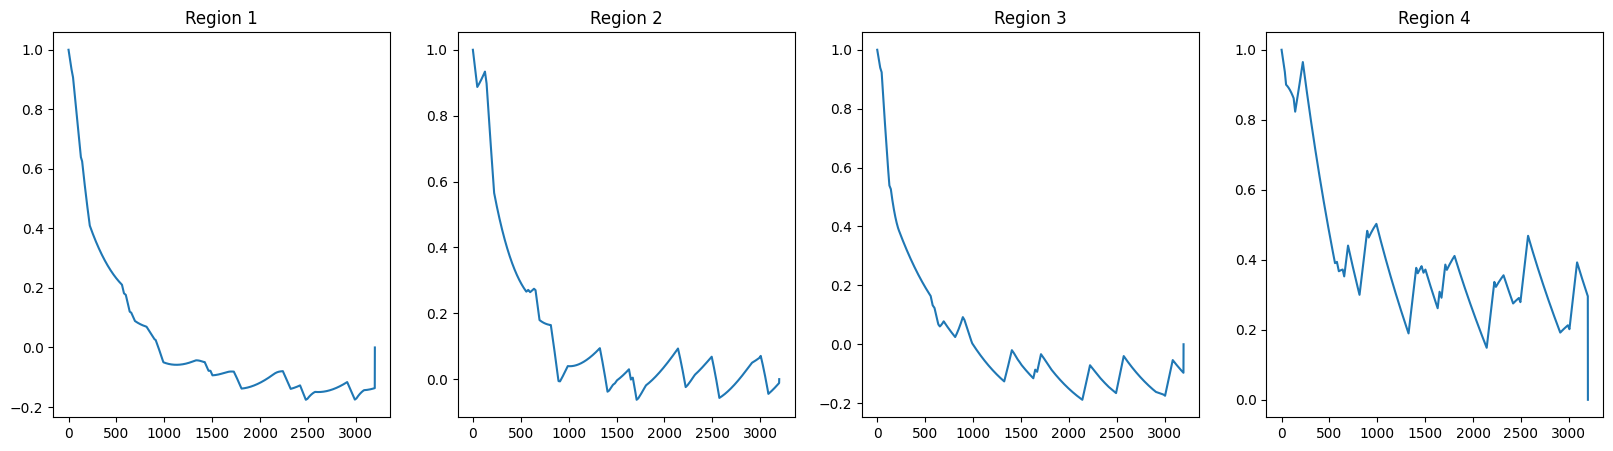

In [6]:
# Plotting the state vector for each region
fig, ax = plt.subplots(1, 4, figsize = (20, 5))

ax.flatten()[0].plot(state_vec[:,0])
ax.flatten()[0].set_title("Region 1")

ax.flatten()[1].plot(state_vec[:,1])
ax.flatten()[1].set_title("Region 2")

ax.flatten()[2].plot(state_vec[:,2])
ax.flatten()[2].set_title("Region 3")

ax.flatten()[3].plot(state_vec[:,3])
ax.flatten()[3].set_title("Region 4")

fig.subplots_adjust(hspace = 0.8)

Now we use the hemodynamic equations to convert this estimated neural state vector into a BOLD fMRI signal. We start with the vasodilatory signal and flow equations, which are co-dependent. 

In [7]:
kappa = 0.64 * np.exp(random_state.normal(0, np.sqrt(1 / 256))) # Rate of vasodilatory signal decay (prior)
gamma = 6 # Rate of decay to feedback to vasodilatory signal (prior)

s = np.zeros((3200, 4))
f = np.zeros((3200, 4))

s[0, :] = 1
f[0, :] = 1

def dsdt(x, s_prev, f_prev):
    dsdt = x - kappa * s_prev - gamma * (f_prev - np.ones(4))
    return dsdt

def dfdt(s_prev):
    dfdt = s_prev
    return dfdt

dt = 0.001 # (s)
for t in range(1, len(s) - 1):
    s[t, :] = s[t - 1, :] + dsdt(state_vec[t - 1, :], s[t - 1, :], f[t - 1, :]) * dt
    f[t, :] = f[t - 1, :] + dfdt(s[t - 1, :]) * dt

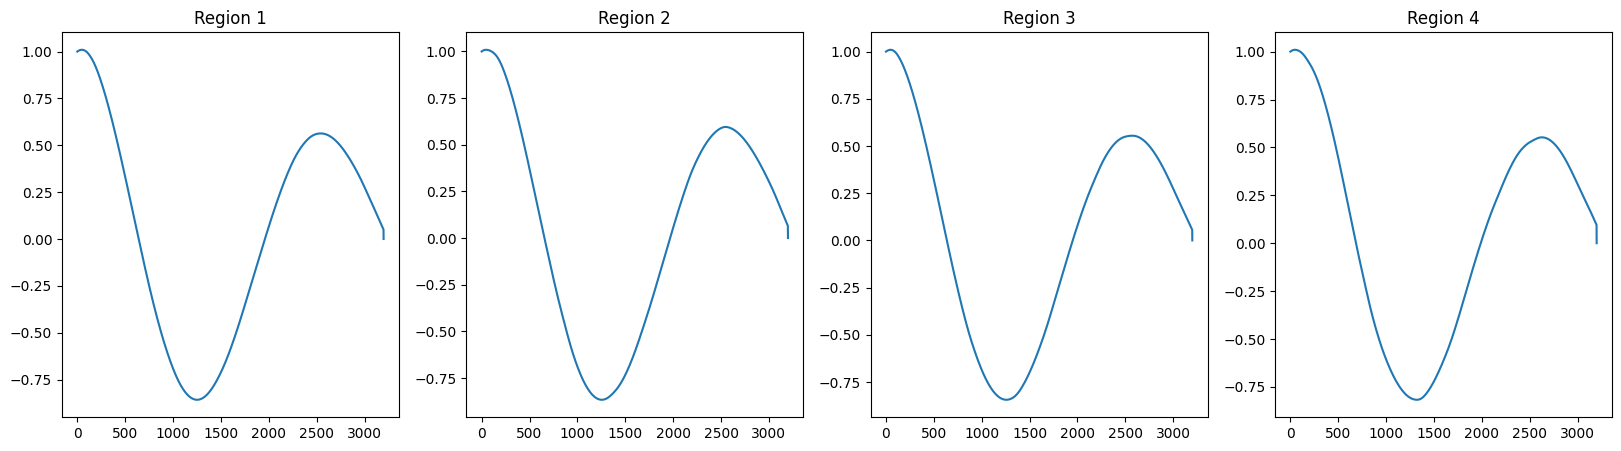

In [8]:
# Plotting the vasodilatory vec for each region 

fig, ax = plt.subplots(1, 4, figsize = (20, 5))

ax.flatten()[0].plot(s[:,0])
ax.flatten()[0].set_title("Region 1")

ax.flatten()[1].plot(s[:,1])
ax.flatten()[1].set_title("Region 2")

ax.flatten()[2].plot(s[:,2])
ax.flatten()[2].set_title("Region 3")

ax.flatten()[3].plot(s[:,3])
ax.flatten()[3].set_title("Region 4")

fig.subplots_adjust(hspace = 0.8)

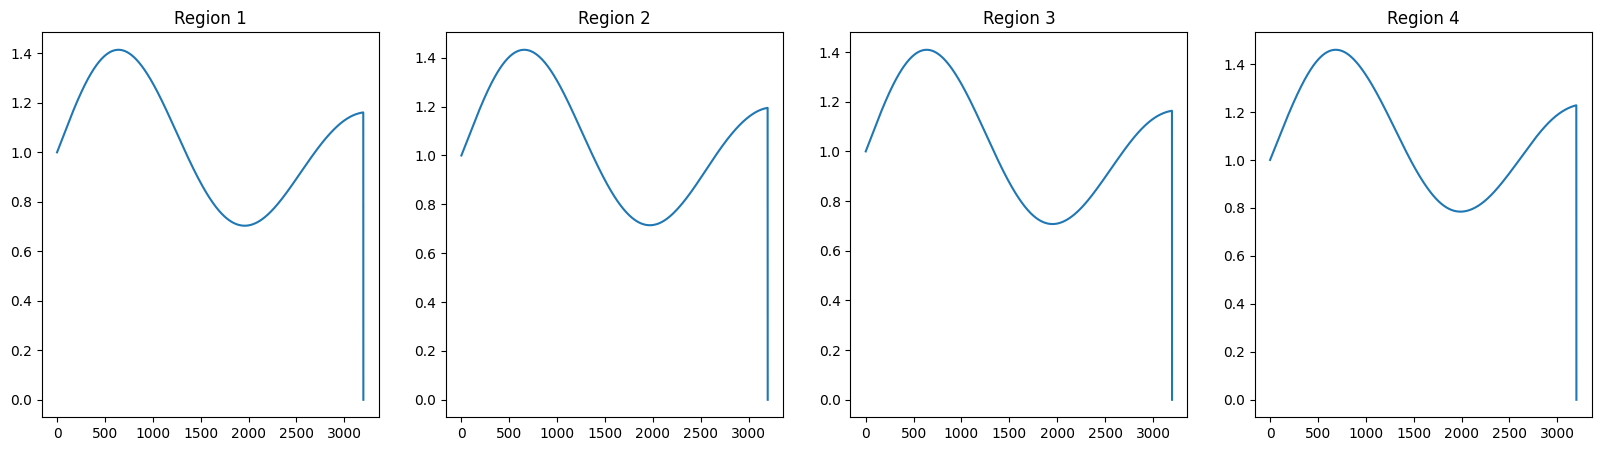

In [9]:
# Plotting the flow vector for each region

fig, ax = plt.subplots(1, 4, figsize = (20, 5))

ax.flatten()[0].plot(f[:,0])
ax.flatten()[0].set_title("Region 1")

ax.flatten()[1].plot(f[:,1])
ax.flatten()[1].set_title("Region 2")

ax.flatten()[2].plot(f[:,2])
ax.flatten()[2].set_title("Region 3")

ax.flatten()[3].plot(f[:,3])
ax.flatten()[3].set_title("Region 4")

fig.subplots_adjust(hspace = 0.8)

Then we use the flow vector and neural state vectors to compute the change in volume and deoxyhemoglobin associated with the balloon hemodynamic model. First, the volume change ODE.

In [10]:
tau = 2 * np.exp(kappa) / 0.64 # hemodynamic transit time (seconds, static)
alpha = 0.32 # Grubb's exponent (blood vessel stiffness, static)

v = np.zeros((3200, 4))
v[0, :] = 0.1

def dvdt(v_prev, f_prev):
    return 1 / tau * (f_prev - v_prev) ** (1 / alpha)

dt = 0.001 # (s)
for t in range(1, len(s) - 1):
    v[t, :] = v[t - 1, :] + dvdt(v[t - 1, :], f[t - 1, :]) * dt

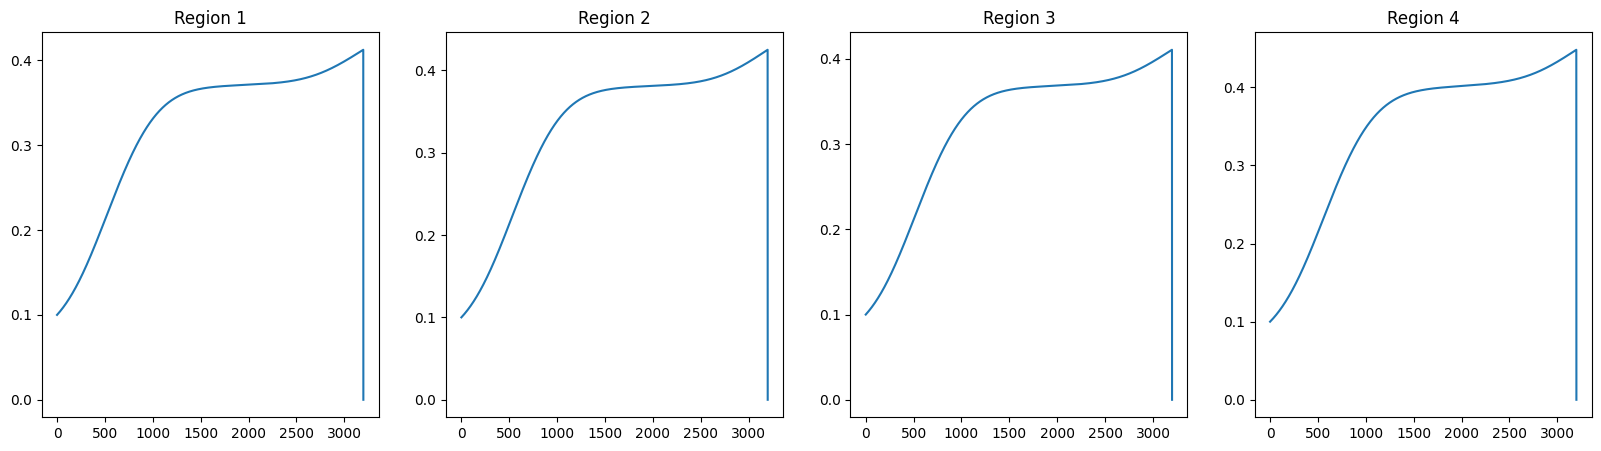

In [11]:
# Plotting the volume vector for each region
fig, ax = plt.subplots(1, 4, figsize = (20, 5))

ax.flatten()[0].plot(v[:,0])
ax.flatten()[0].set_title("Region 1")

ax.flatten()[1].plot(v[:,1])
ax.flatten()[1].set_title("Region 2")

ax.flatten()[2].plot(v[:,2])
ax.flatten()[2].set_title("Region 3")

ax.flatten()[3].plot(v[:,3])
ax.flatten()[3].set_title("Region 4")

fig.subplots_adjust(hspace = 0.8)

Then the deoxyhemoglobin change ODE. 

In [12]:
E0 = 0.4 # Resting oxygen extraction fraction (static)

def dqdt(q_prev, f_prev, v_prev):
    return (1 / tau) * (f_prev / E0) * (1 - (1 - E0) ** (1 / f_prev)) - v_prev ** (1 / alpha) * (q_prev / v_prev)

q = np.zeros((3200, 4))
q0 = [0]

dt = 0.001 # (s)
for t in range(1, len(s) - 1):
    q[t, :] = q[t - 1, :] + dqdt(q[t - 1, :], f[t - 1, :], v[t - 1, :]) * dt

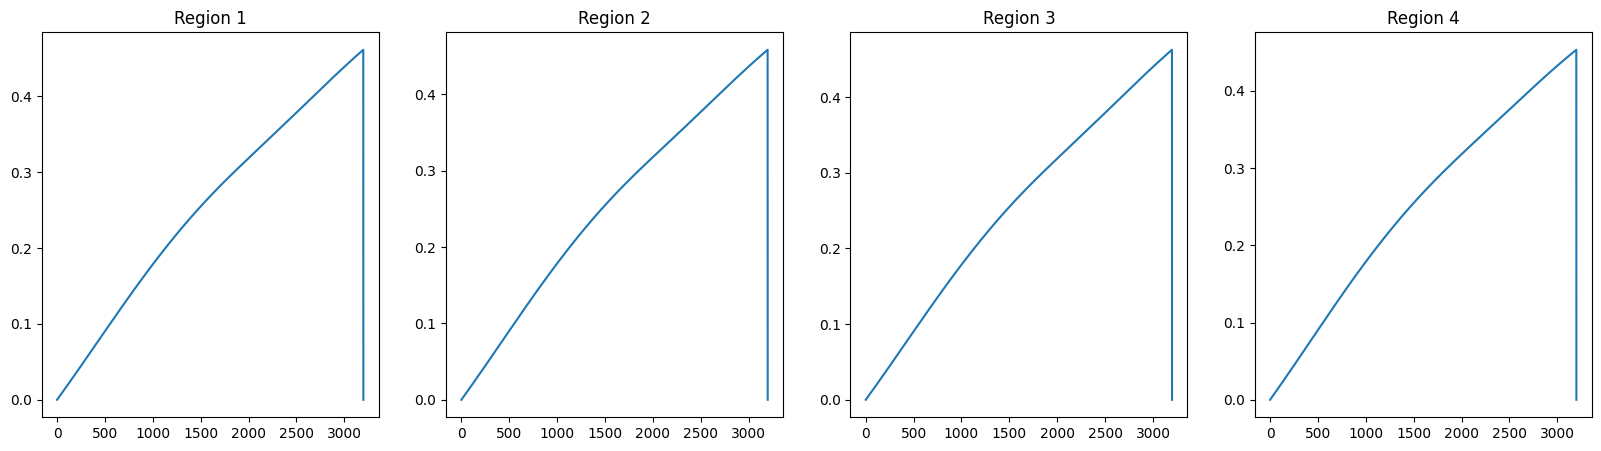

In [13]:
# Plotting the dHb vector for each region
fig, ax = plt.subplots(1, 4, figsize = (20, 5))

ax.flatten()[0].plot(q[:,0])
ax.flatten()[0].set_title("Region 1")

ax.flatten()[1].plot(q[:,1])
ax.flatten()[1].set_title("Region 2")

ax.flatten()[2].plot(q[:,2])
ax.flatten()[2].set_title("Region 3")

ax.flatten()[3].plot(q[:,3])
ax.flatten()[3].set_title("Region 4")

fig.subplots_adjust(hspace = 0.8)

Then the BOLD signal change equation to get the change in signal above baseline produced by each region. This provides the basis of the BOLD timeseries we will compare with the experimental data. 

In [14]:
TE = 0.04     # fMRI echo time (static)
epsilon_h = 1 # Fraction of intravascular to extravascular signal (prior) --> original prior was zero changed to 1
r0 = 25       # Oxygen extraction rate constant (static)
nu0 = 40.3    # Blood volume normalized to rest (static)      # Resting venous blood volume fraction (static) --> original prior was zero, changed to 1

k1 = 4.3 * nu0 * E0 * TE
k2 = epsilon_h * r0 * E0 * TE
k3 = 1 - epsilon_h

dS_S0 = v[0] * (k1 * (1 - q) + k2 * (1 - q / v) + k3 * (1 - v))

/var/folders/gs/_z8_31zd6xz_w20ny978y50w0000gn/T/ipykernel_5876/2163167007.py:10: RuntimeWarning: invalid value encountered in divide
  dS_S0 = v[0] * (k1 * (1 - q) + k2 * (1 - q / v) + k3 * (1 - v))


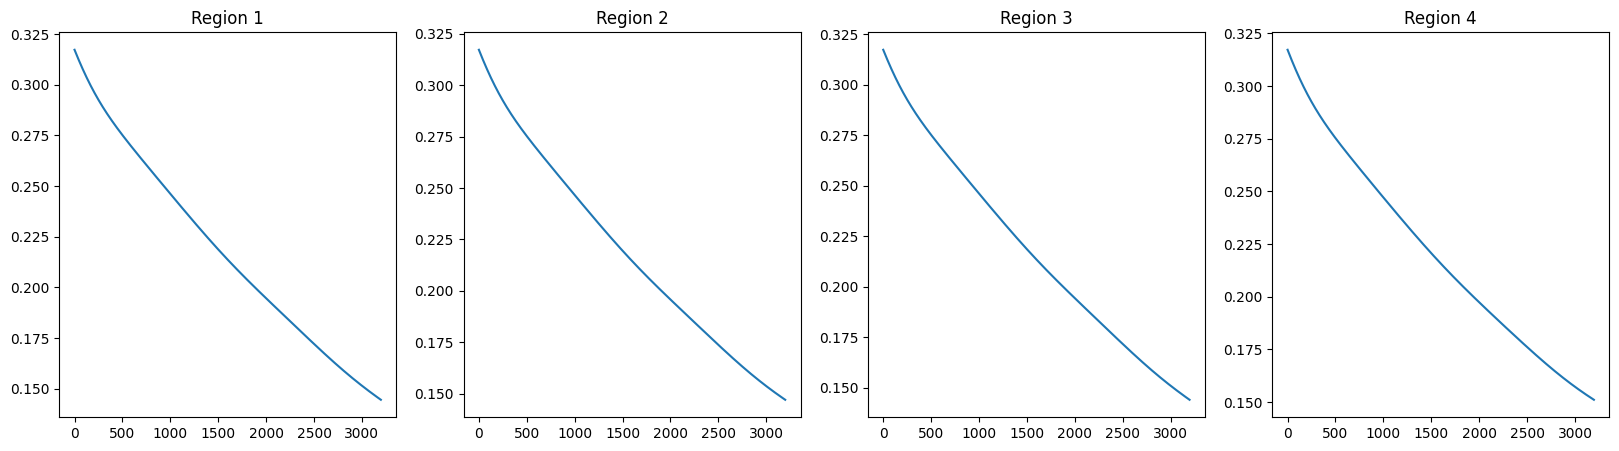

In [15]:
# Plotting the solution vector for each region
fig, ax = plt.subplots(1, 4, figsize = (20, 5))

ax.flatten()[0].plot(dS_S0[:,0])
ax.flatten()[0].set_title("Region 1")

ax.flatten()[1].plot(dS_S0[:,1])
ax.flatten()[1].set_title("Region 2")

ax.flatten()[2].plot(dS_S0[:,2])
ax.flatten()[2].set_title("Region 3")

ax.flatten()[3].plot(dS_S0[:,3])
ax.flatten()[3].set_title("Region 4")

fig.subplots_adjust(hspace = 0.8)

Now, we form the BOLD signal timeseries by adding in several more parameters to the equation: 

$y = g(z, \theta^h) + X_0 \beta_0 + \epsilon$

where $g(z, \theta^h)$ is what we just computed, $X_0$ is the design matrix for null effects and $\beta_0$ associated parameters, and $\epsilon$ is normally distributed observation noise.

For our purposes, we will assume that $X_0$ and $\beta_0$ are null, so we won't need to consider their effects. We will also not consider the effects of $\epsilon$, since our approximated data is normally distributed. 